So we basially know ***Supervised Learning*** and ***Unsupervised Learning*** 

In ***Supervised Learning*** 
- Regression (Predict contiuous values on basis on independent and dependent) 
    - Linear Regression
    - Lasso Regression
    - Ridge Regression
- Classification (Classify data type in similar category)
    - Binary Logistic Regression

#### Classification

- Suppose we have StudentMarks and on basis on that, we classify them into Pass and Fail

- Suppose we have weight, we can classify that into obese and not obese


#### Why do we need Logistic Regression??

On the basis of the data, it is gonna change a best fit line everytime and if there is any outlier, there'll be no efficiency in the o/p.

To deal with this Outlier issue, we are going to use Stigmoid function = 1/1+e^-x. 
Sigmoid Function takes any real values between 0 and 1 and gives us an output in 0 and 1, And when we plot it, it gives us S shape curve.

### Logistic Regression  
- x-> Independent variable -> continuous
- y-> dependent variable -> categorical or binary categories (0,1)

P(X) = 1/ 1+e^-(B0 + B1X)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Visualization

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

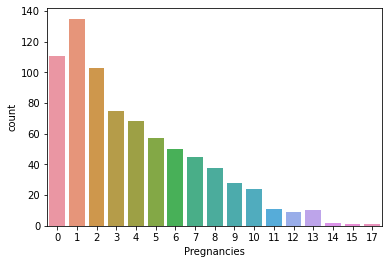

In [7]:
sns.countplot(x= "Pregnancies", data=data)

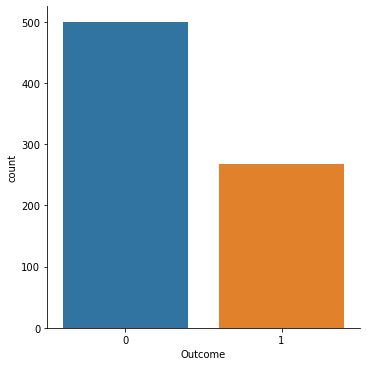

In [8]:
sns.catplot(data = data, x ="Outcome", kind = "count")

<AxesSubplot:>

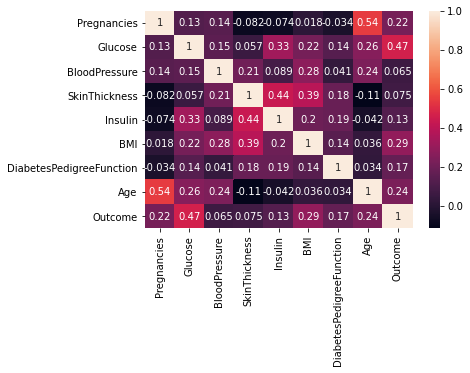

In [9]:
sns.heatmap(data.corr(), annot = True)

The Insulin and SkinThickness measurements are not highly correlated with any given outcome.

- 1  -> positive corrrelation
- 0  -> No correlation
- -1 -> Negtive Correlation

In [10]:
x = data.drop(columns =["Outcome"])
y = data["Outcome"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [13]:
#0 -> not diabetic
#1 -> is diabetic

from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression()

In [15]:
model.fit(xtrain,ytrain)

C:\Users\tejas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
ypred = model.predict(xtest)

In [17]:
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score

acs = accuracy_score(ytest,ypred)
acs

0.8246753246753247

### Confusion Matrix
- ***true positives (TP)***: These are cases in which we predicted having diabetes, and the test showed the patient is diabetes.
- ***false positives (FP)***: We predicted diabetes hai, but they don't actually have diabetes (Also known as a "Type I error.")
- ***false negatives (FN)***: We predicted diabetes nahi hai, but they actually do have the diabetes (Also known as a "Type II error.")
- ***true negatives (TN)***: We predicted non diabetic, and they are non diabetic.

<AxesSubplot:>

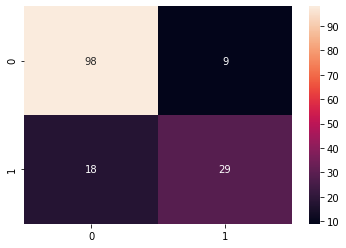

In [19]:
from sklearn.metrics import confusion_matrix

cnm = confusion_matrix(ytest,ypred)
sns.heatmap(cnm,annot = True)

- Calculating Accuracy : Overall Performace of a Model 
    - TP + TN / TP + FN + FP + TN = TP + TN / Total
    
- Recall: How accurate possitive predictions were? 
    - TP / TP + FN   (Value should be high)
    
- Precision: How many are actual positive values
    - TP / TP + FP
    
- F-measure: To get precision recall measure at same time
    - 2 x Recall x Precision / Recall + Precision

In [20]:
from sklearn.metrics import classification_report
classification_report(ytest, ypred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.92      0.88       107\n           1       0.76      0.62      0.68        47\n\n    accuracy                           0.82       154\n   macro avg       0.80      0.77      0.78       154\nweighted avg       0.82      0.82      0.82       154\n'

### AUC-ROC

#### ROC: Curve of Probabillity
False Positive Rate vs True Positive Rate
#### AUC: Degree of Seperability
Used to tell the performance how good your model can classify your data point.

ROC -> FPR, TPR

- ***AUC SHOULD BE HIGH*** :  curve should be a curve
    - AUC = 1 -> Model is good
    - AUC = 0 -> Model cant classify the data points. 

- **AUC IS NOT GOOD** if the curve is a slant line or straight line.

In [21]:
from sklearn import metrics

In [22]:
#Here we are finding the probability of the o/p coming 0 and 1 for xtest So the first columns is probabaility of 0, and second value is probablity of getting 1
ypred_prob = model.predict_proba(xtest)  
#ypred_prob

In [23]:
 #to get all the probabilities of 1, we slice the ypred_prob, by saying we need all rows (:) nd only 1st column(that has probabilty of getting 1)
ypred_prob = model.predict_proba(xtest)[:,1] 
ypred_prob

array([0.96299168, 0.17073293, 0.10176827, 0.62083858, 0.12917603,
       0.03957535, 0.74301387, 0.84021768, 0.38880301, 0.34334566,
       0.57536927, 0.9576819 , 0.27423769, 0.17793259, 0.11883378,
       0.16326408, 0.86182123, 0.0288031 , 0.39566321, 0.25732157,
       0.66496398, 0.45160238, 0.23295357, 0.06081031, 0.05328301,
       0.38014436, 0.04828824, 0.90630857, 0.11840735, 0.15138527,
       0.44167842, 0.25974035, 0.0973934 , 0.46086763, 0.10771667,
       0.72609413, 0.44227726, 0.09056167, 0.34501231, 0.75945202,
       0.29841178, 0.23838359, 0.16242653, 0.84141718, 0.72120094,
       0.00890452, 0.08971137, 0.20788318, 0.35840712, 0.32010158,
       0.41632724, 0.20070159, 0.87176089, 0.48762432, 0.14129356,
       0.00278531, 0.06218446, 0.58114118, 0.29974208, 0.07634903,
       0.71130499, 0.47183145, 0.11995454, 0.74964902, 0.71163135,
       0.91005018, 0.71927396, 0.14472665, 0.36598585, 0.10783938,
       0.13794143, 0.42192075, 0.1037552 , 0.95343925, 0.86728

In [24]:
fpr,tpr,_= metrics.roc_curve(ytest,ypred_prob)

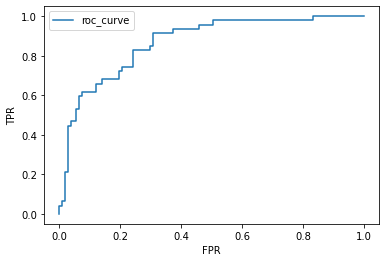

In [25]:
auc = metrics.roc_auc_score(ytest,ypred_prob)
plt.plot(fpr,tpr, label = "roc_curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

In [26]:
auc

0.8665738715450388